In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier


In [123]:
X = np.array([[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]])
Y = np.array(['Red', 'Red', 'Red', 'Green', 'Green', 'Red'])
predict = np.array([0,0,0])

In [48]:
np.around(np.linalg.norm(predict - X, axis = 1), decimals=2)

array([3.  , 2.  , 3.16, 2.24, 1.41, 1.73])

In [135]:
def NN(X, Y, predict):
    closest_point = None
    closest_distance = float('inf')
    idx = None
    for i in range(len(X)):
        current_distance = np.linalg.norm(predict - X[i])
        if current_distance <= closest_distance:
            closest_distance = current_distance
            closest_point = X[i]
            idx = i
#     print(idx)
    return Y[idx]


In [136]:
NN(X, Y, predict)

'Green'

In [137]:
def kNN(k, X, Y, predict):
    distance = np.linalg.norm(predict - X, axis = 1)
    idx_bottom_k = np.argpartition(distance, k)[:k]
    bottom_Y = Y[idx_bottom_k]
    print(idx_bottom_k, bottom_Y)
    return max(Counter(bottom_Y))   

In [138]:
kNN(3, X, Y, predict)

[4 5 1] ['Green' 'Red' 'Red']


'Red'

In [184]:
fpr = np.array(fpr)
tpr = np.array(tpr)
X_pr = [[fpr[i],tpr[i]] for i in range(len(fpr))]
# print(X_pr)
ideal = np.array([0,1])
dis = np.array([np.linalg.norm(X_pr[i]-ideal) for i in range(len(X_pr))])
# print(dis)
idx = dis.argmin()
threshold = y_score[idx]
threshold

0.55

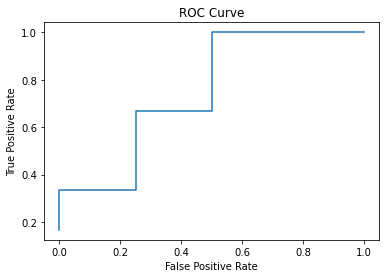

In [182]:
# 1.5 Draw ROC curve
y_true = ["+", "+", "-", "+", "+", "-", "+", "+", "-", "-"]
y_score = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]

fpr = []
tpr = []

for threshold in y_score:
    # Calculate the true positive count, false positive count, true negative count, and false negative count
    tp = sum([1 for i in range(len(y_true)) if y_true[i] == "+" and y_score[i] >= threshold])
    fp = sum([1 for i in range(len(y_true)) if y_true[i] == "-" and y_score[i] >= threshold])
    tn = sum([1 for i in range(len(y_true)) if y_true[i] == "-" and y_score[i] < threshold])
    fn = sum([1 for i in range(len(y_true)) if y_true[i] == "+" and y_score[i] < threshold])
    
    # Calculate the false positive rate and true positive rate
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))


# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.savefig("5.1.pdf", format="pdf")
plt.show()


In [51]:
def load_dataset(name):
    X, y = [], []
    with open("./" + name) as f:
        for line in f:
            instance = [float(x) for x in line.split()[:-1]]
            # print(instance)
            label = int(line.split()[-1])
            X.append(instance)
            y.append(label)
    return np.array(X), np.array(y)

In [96]:
X, y = load_dataset(name = "D2z.txt")

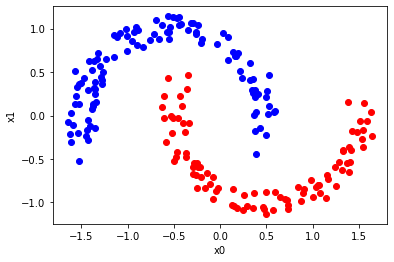

In [53]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = "red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = "blue")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

In [82]:
def _predict(X_train, y_train, x, k):
        distances = np.linalg.norm(x - X_train, axis = 1)
        # print(distances.shape)
        # nearest = np.argsort(distances)
        # topK_y = [y_train[i] for i in nearest[:k]]
        nearest = np.argpartition(distances,k)[:k]
        topK_y = y_train[nearest]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]

def predict(X_train, y_train, X_predict, k):

        y_predict = [_predict(X_train, y_train, x, k) for x in X_predict]
        return np.array(y_predict)


In [83]:
def plot_decision_boundary(predict_func, X_train, y_train):   
    x0, x1 = np.meshgrid(
        np.arange(-2.0,2.1,0.1).reshape(-1, 1),
        np.arange(-2.0,2.1,0.1).reshape(-1, 1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = np.array([predict_func(X_train, y_train, instance, k = 1) for instance in X_new])
    zz = y_predict.reshape(x0.shape)

    plt.plot(x0[zz == 0], x1[zz == 0], '+', color='pink')
    plt.plot(x0[zz == 1], x1[zz ==1], '+', color='green')

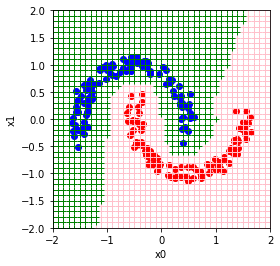

In [97]:
plot_decision_boundary(_predict,X, y) 
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = "red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = "blue")
plt.xlabel("x0")
plt.ylabel("x1")
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("2.1.1.pdf", format="pdf")
plt.show()

## 2. Programming 

In [91]:
# Load data set and display first few observations
dataset = pd.read_csv("emails.csv")
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [92]:
X_email = dataset.drop(columns=['Email No.', 'Prediction'])
y_email = dataset['Prediction']

In [93]:
def _predict(X_train, y_train, x, k):
        distances = np.linalg.norm(x - X_train, axis = 1)
        nearest = np.argpartition(distances,k)[:k]
        topK_y = y_train[nearest]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]

def predict(X_train, y_train, X_predict, k):

        y_predict = [_predict(X_train, y_train, x, k) for x in X_predict]
        return np.array(y_predict)


In [102]:
# 1NN for 5-fold cross validation
def run_knn(K = 1, fold = 5):
    all_idx = np.arange(5000)
    idxes = np.split(all_idx, 5)
    X = X_email.values
    y = y_email.values
    all_acc, all_prec, all_recall = [], [], []

    for i in range(FOLD):
        test_idx = idxes[i]
        train_idx = list(set(all_idx) - set(idxes[i]))
        X_test, y_true = X[test_idx], y[test_idx]
        X_train, y_train = X[train_idx], y[train_idx]
        print(len(test_idx), len(train_idx))
        y_pred = predict(X_train, y_train, X_test, k = K)

        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)

        all_acc.append(acc)
        all_prec.append(prec)
        all_recall.append(recall)

        print("Fold: ", i+1)
        print("Accuracy:", acc)
        print("Precision:", prec)
        print("Recall:", recall)
        
        # verify correctness  
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        sk_acc = accuracy_score(y_true, y_pred)
        print("SKlearn Accuracy:", sk_acc)
        
        
    return all_acc

In [101]:
# 2
all_acc = run_knn(K = 1, fold = 5)

1000 4000
Fold:  1
Accuracy: 0.825
Precision: 0.6544943820224719
Recall: 0.8175438596491228
SKlearn Accuracy: 0.825
1000 4000
Fold:  2
Accuracy: 0.853
Precision: 0.6857142857142857
Recall: 0.8664259927797834
SKlearn Accuracy: 0.853
1000 4000
Fold:  3
Accuracy: 0.862
Precision: 0.7212121212121212
Recall: 0.8380281690140845
SKlearn Accuracy: 0.862
1000 4000
Fold:  4
Accuracy: 0.851
Precision: 0.7164179104477612
Recall: 0.8163265306122449
SKlearn Accuracy: 0.851
1000 4000
Fold:  5
Accuracy: 0.775
Precision: 0.6057441253263708
Recall: 0.7581699346405228
SKlearn Accuracy: 0.775


In [106]:
# 4 calculation
def run_knn_fast(K = 1, fold = 5):
    '''
    For faster calculation, I used sklearn 
    '''
    all_idx = np.arange(5000)
    idxes = np.split(all_idx, 5)
    X = X_email.values
    y = y_email.values
    all_acc = []

    for i in range(FOLD):
        test_idx = idxes[i]
        train_idx = list(set(all_idx) - set(idxes[i]))
        X_test, y_true = X[test_idx], y[test_idx]
        X_train, y_train = X[train_idx], y[train_idx]
        
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_true, y_pred)

        all_acc.append(acc)

        print("Fold: ", i+1)
        print("Accuracy:", acc)
          
    return all_acc

avg_acc = []
k_values = [1,3,5,7,10]
for k in k_values:
    all_acc = run_knn_fast(K = k, fold = 5)
    avg_acc.append(np.array(all_acc).mean())      

Fold:  1
Accuracy: 0.825
Fold:  2
Accuracy: 0.853
Fold:  3
Accuracy: 0.862
Fold:  4
Accuracy: 0.851
Fold:  5
Accuracy: 0.775
Fold:  1
Accuracy: 0.847
Fold:  2
Accuracy: 0.851
Fold:  3
Accuracy: 0.859
Fold:  4
Accuracy: 0.88
Fold:  5
Accuracy: 0.774
Fold:  1
Accuracy: 0.837
Fold:  2
Accuracy: 0.85
Fold:  3
Accuracy: 0.869
Fold:  4
Accuracy: 0.869
Fold:  5
Accuracy: 0.779
Fold:  1
Accuracy: 0.839
Fold:  2
Accuracy: 0.864
Fold:  3
Accuracy: 0.875
Fold:  4
Accuracy: 0.874
Fold:  5
Accuracy: 0.779
Fold:  1
Accuracy: 0.862
Fold:  2
Accuracy: 0.869
Fold:  3
Accuracy: 0.878
Fold:  4
Accuracy: 0.887
Fold:  5
Accuracy: 0.782


[0.8332, 0.8422000000000001, 0.8408, 0.8462, 0.8556000000000001]


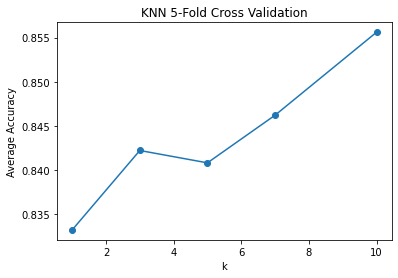

In [108]:
# 4 plotting
print(avg_acc)
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data as a line plot
ax.plot(k_values, avg_acc, marker='o')

# Set the axis labels and title
ax.set_xlabel('k')
ax.set_ylabel('Average Accuracy')
ax.set_title('KNN 5-Fold Cross Validation')

# Show the plot
plt.show()

In [116]:
# logistic regression

import numpy as np

# import scipy

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return [1 if i > 0.5 else 0 for i in y_pred]
    
    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return y_pred
    
    def _sigmoid(self, z):
        # return scipy.special.expit(x)
        return 1 / (1 + np.exp(-z))
    

In [111]:
# LR for 5-fold cross validation
def run_LR(fold = 5):
    model = LogisticRegression()
    all_idx = np.arange(5000)
    idxes = np.split(all_idx, 5)
    X = X_email.values
    y = y_email.values
    all_acc, all_prec, all_recall = [], [], []

    for i in range(FOLD):
        test_idx = idxes[i]
        train_idx = list(set(all_idx) - set(idxes[i]))
        X_test, y_true = X[test_idx], y[test_idx]
        X_train, y_train = X[train_idx], y[train_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)

        all_acc.append(acc)
        all_prec.append(prec)
        all_recall.append(recall)

        print("Fold: ", i+1)
        print("Accuracy:", acc)
        print("Precision:", prec)
        print("Recall:", recall)
                       
    return all_acc

In [112]:
run_LR(fold = 5)

<ipython-input-109-2ef86981649c>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold:  1
Accuracy: 0.957
Precision: 0.926056338028169
Recall: 0.9228070175438596


<ipython-input-109-2ef86981649c>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold:  2
Accuracy: 0.955
Precision: 0.9264705882352942
Recall: 0.9097472924187726


<ipython-input-109-2ef86981649c>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold:  3
Accuracy: 0.939
Precision: 0.9239543726235742
Recall: 0.8556338028169014


<ipython-input-109-2ef86981649c>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold:  4
Accuracy: 0.954
Precision: 0.9105960264900662
Recall: 0.935374149659864


<ipython-input-109-2ef86981649c>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fold:  5
Accuracy: 0.922
Precision: 0.875
Recall: 0.869281045751634


[0.957, 0.955, 0.939, 0.954, 0.922]

<ipython-input-114-994b53399656>:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


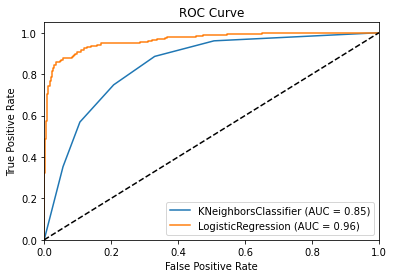

In [115]:
# 5 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

X = X_email.values
y = y_email.values
all_idx = np.arange(5000)
idxes = np.split(all_idx, 5)
test_idx = idxes[4]
train_idx = list(set(all_idx) - set(idxes[4]))
X_test, y_true = X[test_idx], y[test_idx]
X_train, y_train = X[train_idx], y[train_idx]

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_scores_knn = knn.predict_proba(X_test)[:, 1]

# LR 
model = LogisticRegression()
model.fit(X_train, y_train)
y_scores_lr = model.predict_proba(X_test)

fpr_knn, tpr_knn, thresholds = roc_curve(y_true, y_scores_knn)
roc_auc_knn = roc_auc_score(y_true, y_scores_knn)

fpr_lr, tpr_lr, thresholds = roc_curve(y_true, y_scores_lr)
roc_auc_lr = roc_auc_score(y_true, y_scores_lr)

# Plot ROC curve
plt.plot(fpr_knn, tpr_knn, label='KNeighborsClassifier (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_lr, tpr_lr, label='LogisticRegression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

